#TASK #1: UNDESTAND THE PROBLEM STATEMENT AND BUSINESS CASE

#TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [3]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [4]:
# Mount the google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [6]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

In [7]:
# load the stock news data
stock_df = pd.read_csv("stock_sentiment.csv")

In [8]:
# Let's view the dataset
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [9]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [10]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

- **How many unique elements are present in the 'sentiment' column? Try to find out with two different methods**

In [11]:
unique_sentiments = stock_df['Sentiment'].nunique()
print("Number of unique elements in the 'sentiment' column:", unique_sentiments)


Number of unique elements in the 'sentiment' column: 2


#TASK #3: PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)



In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
Test = '$I love AI & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

In [14]:
Test = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'

In [15]:
Test_punc_removed = []

for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)

Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'F',
 'i',
 'n',
 'a',
 'n',
 'c',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'P',
 'y',
 't',
 'h',
 'o',
 'n']

In [16]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

In [17]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [18]:
# Let's remove punctuations from our dataset
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

In [19]:
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [20]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [21]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

- **Remove punctuations using a different method**

In [22]:
import string

def remove_punctuation(text):
    # Create a translation table with punctuation characters mapped to None
    translator = str.maketrans('', '', string.punctuation)
    print(translator)
    print(type(translator)) #translator is dictionary type object
    # Remove punctuation using the translation table
    text_without_punctuation = text.translate(translator)
    return text_without_punctuation




In [23]:
# Example usage
text = "Hello, world! How are you?"
text_without_punctuation = remove_punctuation(text)
print(text_without_punctuation)

{33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}
<class 'dict'>
Hello world How are you


# TASK #4: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [24]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [26]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)


    return result

In [27]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [28]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [29]:
stock_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [30]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [31]:
# Join the words into a string
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

In [32]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,mnta
4,OI Over 21.37,1,OI Over 2137,
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,sharemarket live sensex high points nifty test...


- **Modify the code in order keep words that are longer than or equal 2 characters instead of 3**
- **Add 'https' to the list of stopwords and rerun the code**



In [33]:
# Modify the preprocess function to keep words longer than or equal to 2 characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 2 and token not in stop_words:
            result.append(token)

    return result

# Add 'https' to the list of stopwords
stop_words.extend(['https'])

# Apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

# Join the words into a string
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))


In [34]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,id afraid short amzn looking like nearmonopoly...
3,MNTA Over 12.00,1,MNTA Over 1200,mnta
4,OI Over 21.37,1,OI Over 2137,oi
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,gold prices slip rs investors book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,sharemarket live sensex high points nifty test...


# TASK #5: PLOT WORDCLOUD

In [35]:
stock_df.rename(columns={'Text Without Punc & Stopwords': 'Text Without Punc & Stopwords Joined'}, inplace=True)


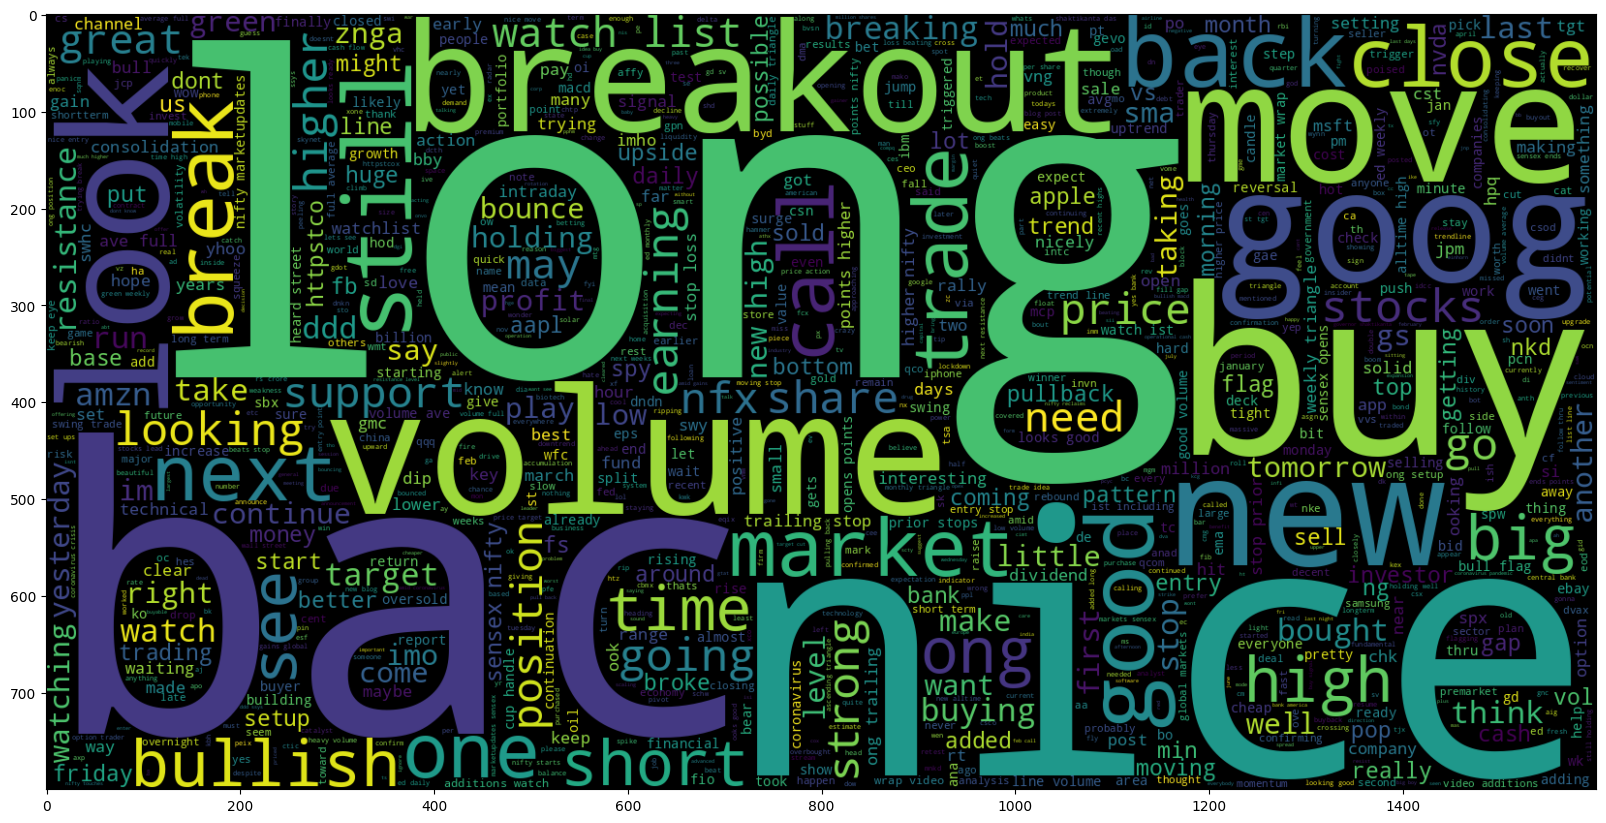

In [36]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

- **Visualize the wordcloud for tweets that have negative sentiment**

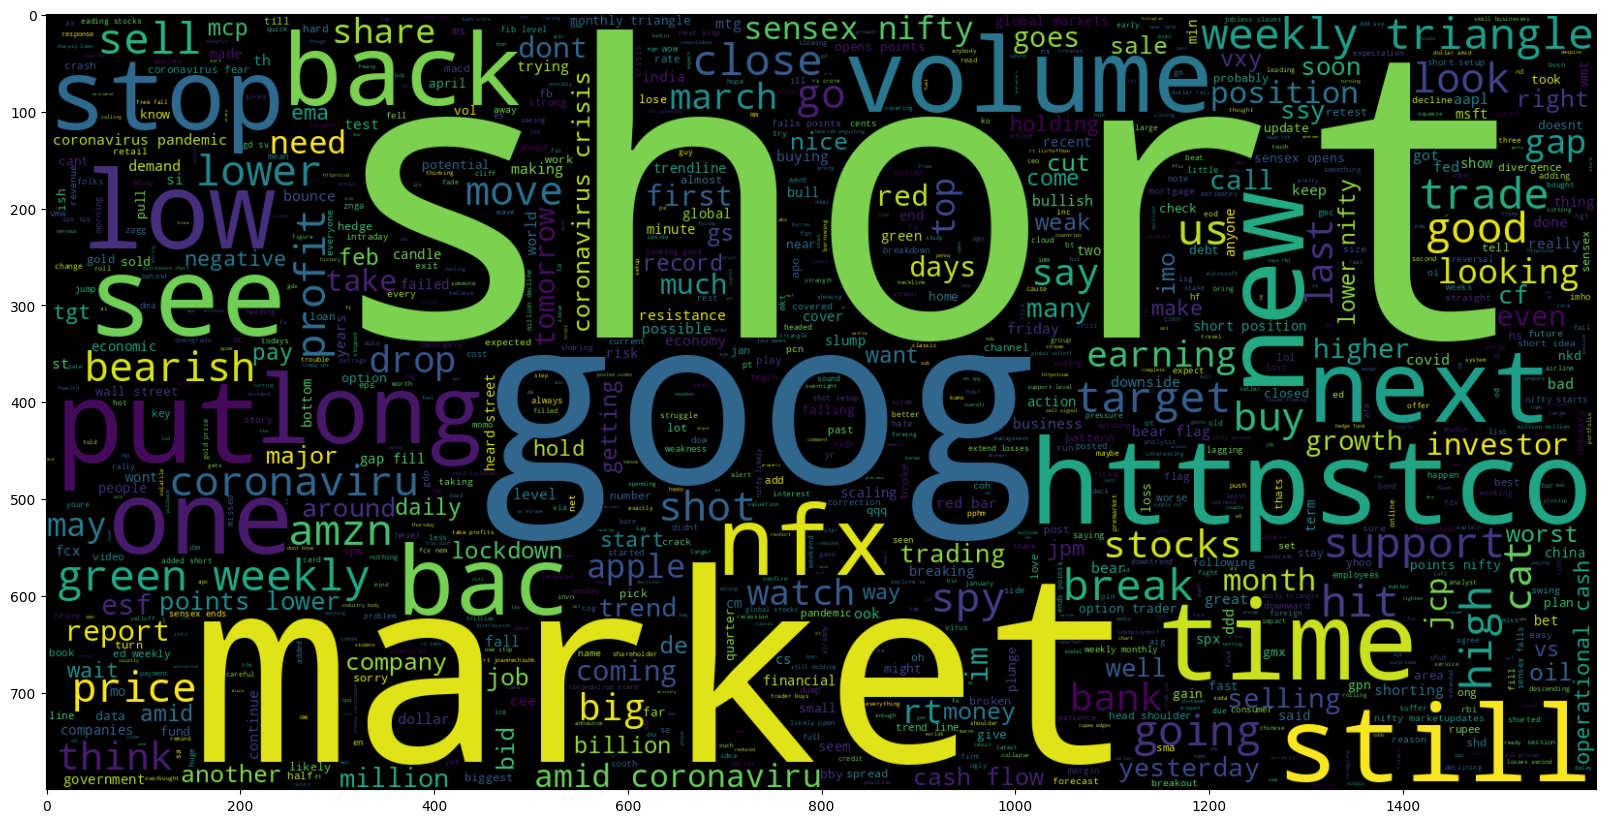

In [37]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

# TASK #6: VISUALIZE CLEANED DATASETS

In [38]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,id afraid short amzn looking like nearmonopoly...
3,MNTA Over 12.00,1,MNTA Over 1200,mnta
4,OI Over 21.37,1,OI Over 2137,oi
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,gold prices slip rs investors book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,sharemarket live sensex high points nifty test...


In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'aj', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [41]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in stock_df['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 22


In [42]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length


[15,
 6,
 8,
 1,
 1,
 1,
 8,
 13,
 8,
 4,
 11,
 18,
 8,
 8,
 11,
 6,
 14,
 10,
 12,
 4,
 7,
 5,
 2,
 5,
 3,
 11,
 3,
 4,
 9,
 6,
 8,
 10,
 9,
 4,
 10,
 13,
 4,
 8,
 12,
 10,
 11,
 7,
 9,
 9,
 5,
 10,
 8,
 7,
 8,
 9,
 11,
 10,
 8,
 2,
 16,
 12,
 10,
 8,
 2,
 15,
 7,
 11,
 5,
 17,
 7,
 7,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 19,
 7,
 9,
 7,
 3,
 11,
 5,
 4,
 10,
 11,
 17,
 4,
 10,
 6,
 7,
 2,
 1,
 7,
 11,
 5,
 7,
 7,
 8,
 10,
 1,
 4,
 10,
 4,
 16,
 9,
 11,
 11,
 18,
 6,
 8,
 13,
 12,
 9,
 3,
 4,
 10,
 10,
 8,
 7,
 8,
 5,
 6,
 8,
 10,
 15,
 3,
 5,
 9,
 19,
 15,
 11,
 3,
 1,
 1,
 3,
 7,
 13,
 12,
 10,
 9,
 12,
 10,
 11,
 16,
 8,
 9,
 10,
 12,
 10,
 6,
 12,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 13,
 5,
 5,
 3,
 7,
 3,
 5,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 11,
 9,
 10,
 12,
 9,
 10,
 7,
 3,
 7,
 5,
 9,
 9,
 4,
 6,
 7,
 4,
 5,
 9,
 10,
 10,
 10,
 14,
 10,
 10,
 10,
 13,
 9,
 7,
 5,
 3,
 12,
 13,
 7,
 10,
 10,
 15,
 13,
 7,
 13,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 3,
 9,
 10,

In [43]:
#give the maximum length of a string with number of words
print(max(tweets_length))

22


In [44]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class**

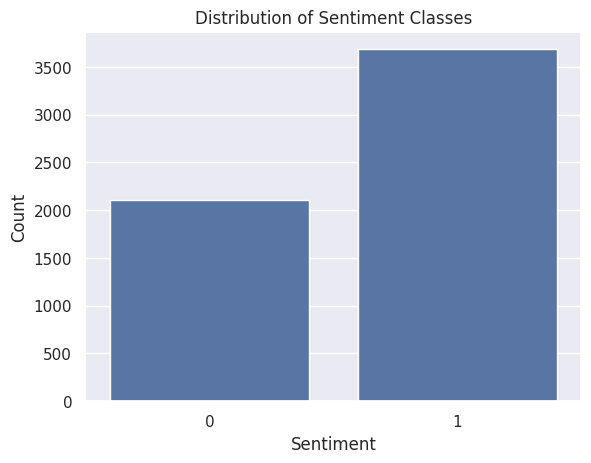

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Plot the countplot
sns.countplot(x="Sentiment", data= stock_df)

# Set labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Classes")

# Show the plot
plt.show()


# TASK #7: PREPARE THE DATA BY TOKENIZING AND PADDING

In [46]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,id afraid short amzn looking like nearmonopoly...
3,MNTA Over 12.00,1,MNTA Over 1200,mnta
4,OI Over 21.37,1,OI Over 2137,oi
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,gold prices slip rs investors book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,sharemarket live sensex high points nifty test...


In [47]:
# Create a new column containing the array of words as a single string
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punc & Stopwords Joined'].apply(lambda x: x.split())

# Display the DataFrame to verify the new column
print(stock_df.head())



                                                Text  Sentiment  \
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2  user I'd be afraid to short AMZN - they are lo...          1   
3                                  MNTA Over 12.00            1   
4                                   OI  Over 21.37            1   

                            Text Without Punctuation  \
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1  user AAP MOVIE 55 return for the FEAGEED indic...   
2  user Id be afraid to short AMZN  they are look...   
3                                   MNTA Over 1200     
4                                    OI  Over 2137     

                Text Without Punc & Stopwords Joined  \
0  kickers watchlist xide tit soq pnk cpw bpz aj ...   
1      movie return feageed indicator trades awesome   
2  id afraid short amzn looking like nearmonopoly...   
3                                   

In [48]:
# Obtain the total words present in the dataset
list_of_words = []
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)


In [49]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'aj',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'id',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'oi',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'im',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 '

In [50]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9647

In [51]:
# another way to find unique words
# Concatenate all arrays of words into a single list
all_words = [word for sublist in stock_df['Text Without Punc & Stopwords'] for word in sublist]

# Get the number of unique words
num_unique_words = len(set(all_words))

print("Number of unique words:", num_unique_words)


Number of unique words: 9647


In [52]:
# split the data into test and train
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
X_train.shape

(4632,)

In [54]:
X_test.shape

(1159,)

In [55]:
X_train

2033      [sour, apple, einhorn, happy, fun, poxy, fight]
1480    [ow, risk, tight, stop, however, would, like, ...
1246                          [znga, take, watch, shorts]
634     [market, looking, strong, think, financials, c...
4225    [stream, sharing, ideas, attacks, earn, direct...
                              ...                        
1584         [solar, sector, bottoming, tan, ts, fs, stp]
5681    [sensex, nifty, close, nearly, higher, fourday...
1290    [broke, support, may, drop, channel, tomorrow,...
2597    [tested, ema, working, bull, flag, expecting, ...
380                     [ax, looks, good, higher, prices]
Name: Text Without Punc & Stopwords, Length: 4632, dtype: object

In [56]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [57]:
train_sequences

[[3558, 108, 1515, 754, 1092, 3559, 686],
 [569, 312, 377, 12, 1516, 64, 3, 21, 20, 37, 269, 163, 958],
 [119, 83, 9, 200],
 [24, 34, 75, 60, 1517, 3560, 132, 844, 14, 97, 10],
 [687, 845, 755, 1257, 2426, 2427, 1257, 688, 1092, 959, 1258, 149],
 [2428,
  1259,
  1518,
  59,
  1519,
  499,
  20,
  2429,
  3561,
  756,
  2430,
  3562,
  757,
  3563,
  3564],
 [1520, 63, 846],
 [103,
  378,
  231,
  689,
  159,
  1868,
  30,
  2431,
  69,
  378,
  133,
  3565,
  3566,
  3567,
  3568],
 [847, 2432, 1, 2433, 111, 1521],
 [1869, 120, 533, 61, 2, 256, 94],
 [405, 3569, 1870, 848, 1871, 3570, 960, 3571, 1260, 500, 335],
 [961, 3572],
 [213, 758, 190, 1093, 13, 14, 182, 3573, 190, 962, 1094, 963, 288, 83],
 [76, 3574, 1261, 3575, 1522, 71, 1, 270, 3576],
 [336, 964, 2434, 3577, 279, 337, 534, 171, 1095, 3578, 3579],
 [221, 849, 25, 98, 690, 379, 759, 313, 1872],
 [3580, 4, 83, 280, 1873, 55, 62, 44, 3581, 353, 125],
 [965, 1523, 1874, 3582, 966],
 [214, 22, 126, 2435, 1262],
 [1875, 88, 570, 6

In [58]:
test_sequences

[[1, 8232],
 [8, 433, 21, 1100, 383, 2344, 201, 1100, 558, 367],
 [73, 6, 457, 48, 642, 226],
 [2227, 5, 159, 3],
 [119, 11, 689, 153, 712, 1723, 996, 2155, 676, 538],
 [1, 237],
 [295, 142, 614, 4, 190],
 [1666, 51, 460, 126, 131, 14, 43],
 [612, 43, 511, 2029, 1577],
 [732, 1271, 2082, 399, 1574, 143, 2207, 2533, 2177],
 [727, 4, 390],
 [3794, 169],
 [1858, 432, 746, 99, 813, 25, 1858],
 [883, 748, 4584, 3719],
 [1493, 1238, 76, 160, 1405, 4],
 [71, 251, 1356, 66, 43, 2038, 1190, 201, 1023, 192],
 [3, 21, 2, 86, 1714, 2380, 99, 143, 169, 2380, 21, 722],
 [45, 856, 15, 37, 544, 2617, 3086, 876],
 [97, 73, 183, 115, 569, 2, 762, 76, 5],
 [70, 414, 115, 837, 65, 441, 486, 111],
 [2768, 592, 669],
 [2320, 3, 901, 7, 1016, 445, 1235],
 [179, 1106, 45, 24, 108],
 [1433, 1749, 5, 37, 198],
 [2106, 414, 115, 157, 502, 315, 1955, 1],
 [266, 2496, 7041, 117, 11, 620, 12],
 [150, 1323, 523, 20, 174, 8022, 598, 624],
 [595, 297, 1197, 429, 117, 88, 1401, 169, 246, 5, 186],
 [897, 1204, 41, 3, 84

In [59]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 1480    [ow, risk, tight, stop, however, would, like, ...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [569, 312, 377, 12, 1516, 64, 3, 21, 20, 37, 269, 163, 958]


In [60]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

In [61]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [3558  108 1515  754 1092 3559  686    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [ 569  312  377   12 1516   64    3   21   20   37  269  163  958    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [119  83   9 200   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]


In [62]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [63]:
y_train_cat.shape

(4632, 2)

In [64]:
y_test_cat.shape

(1159, 2)

In [65]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)


- **Change the padding length to 15 and rerun the code. Verify that padding was successful**


In [66]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

# TASK #9: BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

In [67]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         4939264   
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5759874 (21.97 MB)
Trainable params: 5759874 (21.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
116/116 [==============================] - 14s 65ms/step - loss: 0.6027 - acc: 0.6799 - val_loss: 0.5099 - val_acc: 0.7508
Epoch 2/2
116/116 [==============================] - 3s 26ms/step - loss: 0.3143 - acc: 0.8710 - val_loss: 0.5547 - val_acc: 0.7433



- **Train the model using different embedding output dimension**

In [69]:
# Create the Sequential model
model = Sequential()

# Embedding layer with different output dimension
embedding_output_dim = 256  # Change this value to the desired dimensionality
model.add(Embedding(total_words, output_dim=embedding_output_dim))

# Bi-Directional LSTM layer
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Print model summary
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         2469632   
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3028098 (11.55 MB)
Trainable params: 3028098 (11.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# Train the model
model.fit(padded_train, y_train_cat, batch_size=32, validation_split=0.2, epochs=20)

Epoch 1/20
116/116 [==============================] - 9s 60ms/step - loss: 0.5908 - acc: 0.6893 - val_loss: 0.4914 - val_acc: 0.7400
Epoch 2/20
116/116 [==============================] - 3s 25ms/step - loss: 0.2861 - acc: 0.8874 - val_loss: 0.5097 - val_acc: 0.7573
Epoch 3/20
116/116 [==============================] - 2s 13ms/step - loss: 0.1316 - acc: 0.9533 - val_loss: 0.7230 - val_acc: 0.7433
Epoch 4/20
116/116 [==============================] - 1s 10ms/step - loss: 0.0959 - acc: 0.9671 - val_loss: 0.6861 - val_acc: 0.7379
Epoch 5/20
116/116 [==============================] - 1s 10ms/step - loss: 0.0644 - acc: 0.9792 - val_loss: 1.0832 - val_acc: 0.7292
Epoch 6/20
116/116 [==============================] - 1s 12ms/step - loss: 0.0420 - acc: 0.9827 - val_loss: 1.1318 - val_acc: 0.7206
Epoch 7/20
116/116 [==============================] - 1s 10ms/step - loss: 0.0286 - acc: 0.9892 - val_loss: 1.0100 - val_acc: 0.7292
Epoch 8/20
116/116 [==============================] - 1s 10ms/step - 

# TASK #10: ASSESS TRAINED MODEL PERFORMANCE

In [71]:
# make prediction
pred = model.predict(padded_test)

37/37 [==============================] - 0s 2ms/step


In [72]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [73]:
print(prediction)

[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 

In [74]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [75]:
print(original)

[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 

In [76]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7118205349439172

<Axes: >

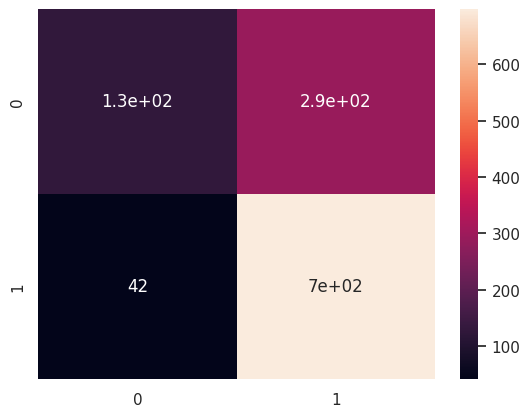

In [77]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)

BERT MODEL

In [78]:
# Install the required libraries
!pip install transformers==4.27.4
!pip install pandas
!pip install scikit-learn

# Import necessary libraries
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

print("Loading CSV data...")
# Load the CSV data
data = pd.read_csv("stock_sentiment.csv")

print("Splitting data into train and test sets...")
# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("Loading pre-trained BERT tokenizer...")
# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

print("Tokenizing text data...")
# Tokenize the text data
train_encodings = tokenizer(list(train_data["Text"]), truncation=True, padding=True, return_tensors="pt")
test_encodings = tokenizer(list(test_data["Text"]), truncation=True, padding=True, return_tensors="pt")

# Create a custom PyTorch dataset
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: v[idx] for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

print("Creating datasets...")
train_dataset = SentimentDataset(train_encodings, train_data["Sentiment"].tolist())
test_dataset = SentimentDataset(test_encodings, test_data["Sentiment"].tolist())

print("Creating data loaders...")
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

print("Loading pre-trained BERT model...")
# Load the pre-trained BERT model for sequence classification
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

# Set the model to train mode
model.train()

print("Defining optimizer and learning rate...")
# Define the optimizer and learning rate
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

print("Starting training loop...")
# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader)}")

print("Starting evaluation...")
# Evaluation
model.eval()
preds = []
labels = []
for batch in test_loader:
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels.extend(batch["labels"].cpu().numpy())
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=-1)
        preds.extend(pred.cpu().numpy())

accuracy = accuracy_score(labels, preds)
f1 = f1_score(labels, preds, average="weighted")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Execution complete.")


Loading CSV data...
Splitting data into train and test sets...
Loading pre-trained BERT tokenizer...
Tokenizing text data...
Creating datasets...
Creating data loaders...
Loading pre-trained BERT model...


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Defining optimizer and learning rate...
Starting training loop...
Epoch 1/3, Loss: 0.5842338265621498
Epoch 2/3, Loss: 0.38250451463542573
Epoch 3/3, Loss: 0.2167411111805537
Starting evaluation...
Accuracy: 0.817083692838654
F1 Score: 0.8183431642399693
Execution complete.


In [79]:
# Assuming you have new text data stored in a list called `new_texts`
new_texts = [
    "I absolutely love this product! It exceeded my expectations in every way.",
    "The customer service was terrible. I had to wait on hold for hours before speaking to someone.",
    "The movie was okay, but nothing special. I wouldn't watch it again.",
    "This book is a masterpiece. I couldn't put it down until I finished.",
    "The quality of the food at the restaurant was top-notch. I highly recommend it to everyone.",
    "The software is full of bugs and crashes constantly. It's a complete waste of money.",
    "The concert last night was incredible! The performers were so talented.",
    "I'm extremely disappointed with the service. My order arrived late and was incorrect.",
    "The hotel room was dirty and smelled awful. I couldn't wait to leave.",
    "The game was really fun to play. I had a great time with my friends."
]

# Tokenize new text data
new_encodings = tokenizer(new_texts, truncation=True, padding=True, return_tensors="pt")

# Create a custom PyTorch dataset for inference
class SentimentInferenceDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {k: v[idx] for k, v in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

# Create a dataset for the new data without labels
new_dataset = SentimentInferenceDataset(new_encodings)

# Create a data loader for the new dataset
new_loader = DataLoader(new_dataset, batch_size=64)

# Put the model in evaluation mode
model.eval()

# List to store predictions
new_preds = []

# Perform inference on the new data
for batch in new_loader:
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=-1)
        new_preds.extend(pred.cpu().numpy())

# Print predictions
for text, pred in zip(new_texts, new_preds):
    print(f"Text: {text}, Predicted Sentiment: {'Positive' if pred == 1 else 'Negative'}")

Text: I absolutely love this product! It exceeded my expectations in every way., Predicted Sentiment: Positive
Text: The customer service was terrible. I had to wait on hold for hours before speaking to someone., Predicted Sentiment: Negative
Text: The movie was okay, but nothing special. I wouldn't watch it again., Predicted Sentiment: Negative
Text: This book is a masterpiece. I couldn't put it down until I finished., Predicted Sentiment: Negative
Text: The quality of the food at the restaurant was top-notch. I highly recommend it to everyone., Predicted Sentiment: Positive
Text: The software is full of bugs and crashes constantly. It's a complete waste of money., Predicted Sentiment: Negative
Text: The concert last night was incredible! The performers were so talented., Predicted Sentiment: Positive
Text: I'm extremely disappointed with the service. My order arrived late and was incorrect., Predicted Sentiment: Negative
Text: The hotel room was dirty and smelled awful. I couldn't wa